In [2]:
import cv2 as cv
import os
import sys
import numpy as np
from matplotlib import pyplot as plt

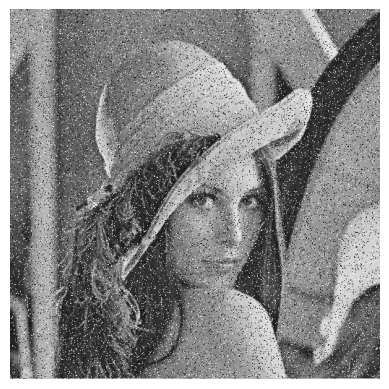

In [4]:
# 設定資料夾路徑 (相對路徑)
folder = 'images' 
filename = 'lena_saltpepper.jpg'
path_img = os.path.join(folder, filename)

# 讀取圖片
img = cv.imread(path_img)

if img is None:
    print(f"錯誤：找不到圖片，請確認路徑是否正確: {path_img}")
else:
    # 轉換為灰階
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # 在 Jupyter 中顯示圖片 (cv.imshow 在 Jupyter 有時會導致當機)
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off') # 隱藏座標軸
    plt.show()

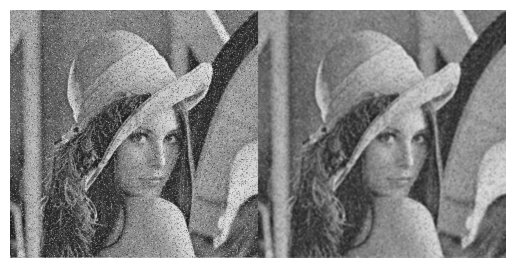

In [6]:
def Average_Blurring(img):
    # ksize 是濾波器的大小，數值越大，圖片越模糊
    ksize = 5 # 建議可以試試 5 或 7，效果會比 3 更明顯
    
    # 使用平均模糊法
    img_blur = cv.blur(img, (ksize, ksize))
    
    # 將兩張圖水平拼接在一起 (Original | Blurred)
    res = np.hstack([img, img_blur])
    
    # 顯示結果
    plt.imshow(res, cmap='gray')
    plt.axis('off') # 隱藏座標軸
    plt.show()

# 執行函式
Average_Blurring(img_gray)

左圖：原始雜訊圖 | 右圖：中值濾波處理後


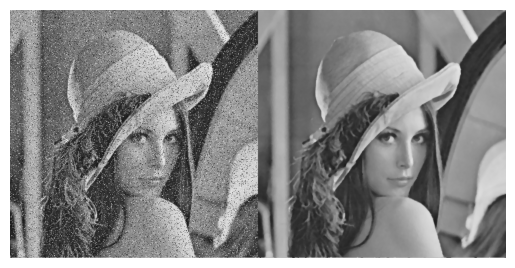

In [7]:
def Median_Blurring(img):
    # ksize 必須是正的「奇數」 (如 3, 5, 7...)
    ksize = 5 
    
    # 進行中值濾波
    img_median = cv.medianBlur(img, ksize)
    
    # 水平拼接：原始圖 vs 中值濾波後
    res = np.hstack([img, img_median])
    
    print("左圖：原始雜訊圖 | 右圖：中值濾波處理後")
    plt.imshow(res, cmap='gray')
    plt.axis('off') # 隱藏座標軸
    plt.show()

# 執行
Median_Blurring(img_gray)

左：原始圖 | 右：高斯模糊


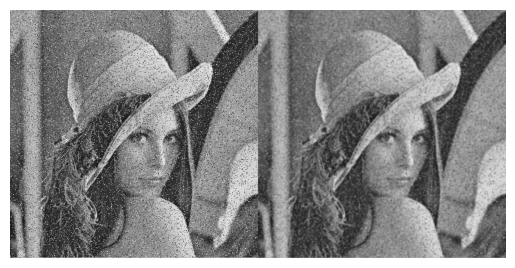

In [8]:
def Gaussian_Blurring(img):
    ksize = 5 # 稍微加大一點，效果比較明顯
    # 參數 0 表示自動計算 sigma；若改為 1.5, 3 等數值，模糊感會不同
    img_gaussianBlur = cv.GaussianBlur(img, (ksize, ksize), 0)
    
    res = np.hstack([img, img_gaussianBlur])
    print("左：原始圖 | 右：高斯模糊")
    plt.imshow(res, cmap='gray')
    plt.axis('off') # 隱藏座標軸
    plt.show()


Gaussian_Blurring(img_gray)

# Rectangular Kernel

In [11]:
kernel_rectangular = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
print(kernel_rectangular)
print(type(kernel_rectangular))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
<class 'numpy.ndarray'>


# Elliptical Kernel

In [12]:
kernel_ellipical = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
print(kernel_ellipical)
print(type(kernel_ellipical))

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
<class 'numpy.ndarray'>


# Crossshaped Kernel

In [14]:
kernel_cross_shaped = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
print(kernel_cross_shaped)
print(type(kernel_cross_shaped))

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
<class 'numpy.ndarray'>


# Rectangle Kernel

In [15]:
kernel = np.ones((5,5),np.uint8)
print(kernel)
print(type(kernel))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
<class 'numpy.ndarray'>


# Morphological Transformations: Erosion(侵蝕)


左：原始圖 | 右：侵蝕 (Erosion) 後


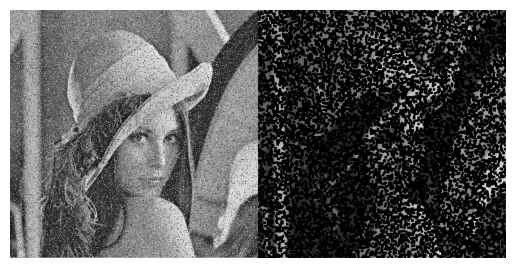

In [9]:
kernel = np.ones((5,5), np.uint8)

# 執行侵蝕，iterations 代表執行次數，次數越多，侵蝕越嚴重
erosion = cv.erode(img_gray, kernel, iterations = 1)

# 合併顯示
res = np.hstack((img_gray, erosion))
print("左：原始圖 | 右：侵蝕 (Erosion) 後")
plt.imshow(res, cmap='gray')
plt.axis('off') # 隱藏座標軸
plt.show()